In [ ]:
# OBJECTIVE: Perform exploratory data analysis and feature engineering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

In [8]:
# Data from 'Data_Wrangling_For_API_Data'
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


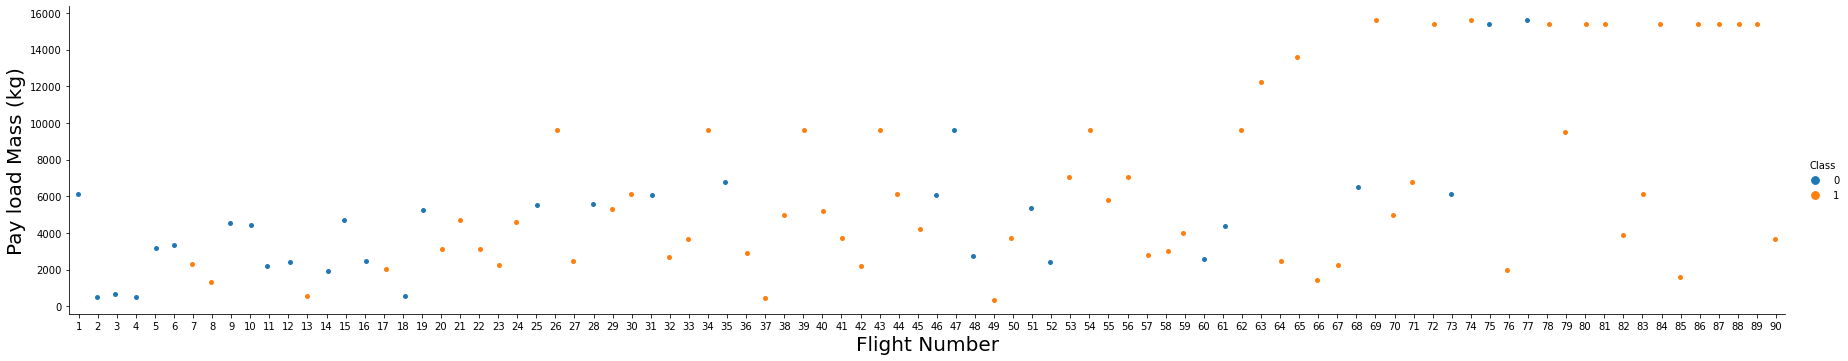

In [9]:
# scatter plot of FlightNumber vs. PayloadMass with Class as color on plot

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# We see that as the flight number increases, the first stage is more likely to land successfully. 
# The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

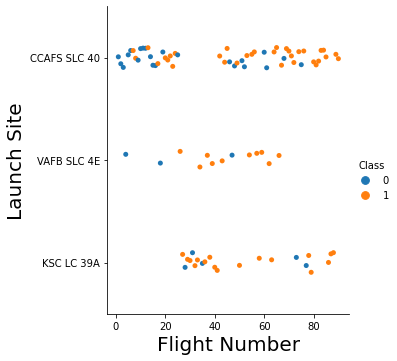

In [10]:
# Scatter plot with Flight Number and launch site. Class as hue
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

#The successes from launch site CCAFS SLC 40 and VAFB SLC 4E increased over time. 

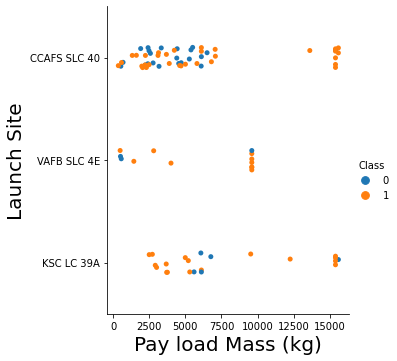

In [6]:
# Scatter plot with Pay Load Mass (kg) and launch site. Class as hue
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# No launches from VAFB-SLC with heavy payload masses

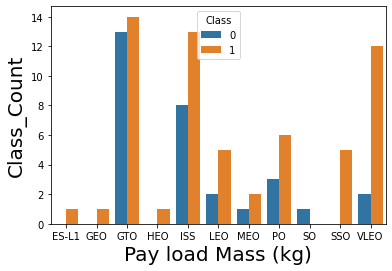

In [11]:
# Get count of Class in each orbit
df2 = df.groupby(['Orbit','Class']).agg(class_count=('Class', 'count'))
df2 = df2.reset_index()

# Bar graph to visualize sucess vs failure counts of each orbit type
sns.barplot(y="class_count", x="Orbit", hue="Class", data=df2)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Class_Count",fontsize=20)
plt.show()

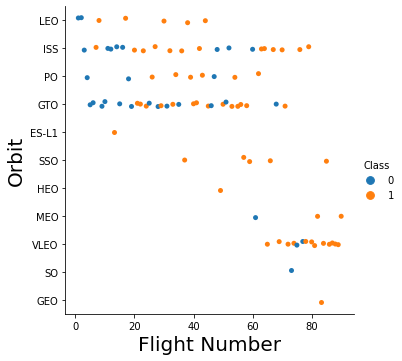

In [31]:
# Scatter plot of FlightNumber and Orbit. Class as hue. 
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

# Sucess in LEO orbit increases over time. No clear relationship in other orbits.

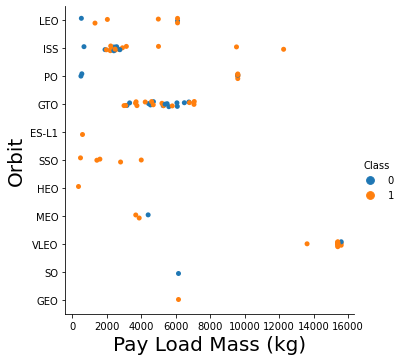

In [35]:
# Scatter plot of Payload and Orbit. Class as hue.
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

# There are more successes with heavier payloads in Polar, LEO, and ISS orbits. 

In [61]:
# Function that Extract years from the date 
year=[]
def Extract_year(date):
    for i in date:
        year.append(i.split("-")[0])
    return year

In [62]:
# Add extract data in the list 'year' in new column 'Year'
date_li = list(df['Date'])
year = Extract_year(date_li)
df['Year'] = year

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


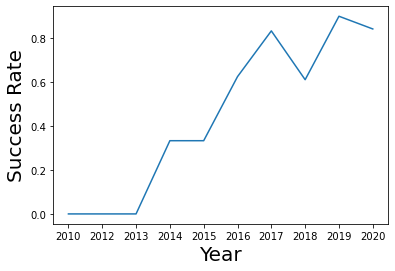

In [75]:
# Calculate success rate

df3 = df.groupby(['Year']).agg(success_rate=('Class', 'mean'))
df3 = df3.reset_index()
df3

# Line plot with year and success rate
sns.lineplot(x="Year", y="success_rate", data=df3)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

# Overall positive trend in success rate.

In [116]:
# Feature Engineering
# Create new dataframe 'features' to include only variables that would help in predicting success rate

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(10)
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [121]:
# Encode categorical columns
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Cast dataframe to variable type 'float64' 

features_one_hot = features_one_hot.astype('float64')

In [129]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

Copyright © 2020 IBM Corporation. All rights reserved.
